In [13]:
import torch
a = torch.randn([4, 3, 3, 3])
print(a.shape)
# print(torch.argmax(a, dim=1))

torch.Size([4, 3, 3, 3])


In [11]:
print(torch.argmax(a, dim=1).shape)  

torch.Size([4, 3, 3])


# 3D dataset
1. 新建的npy文件都在:
    - /data/Data/3D/CPVID19/npy
    - /data/Data/3D/Normal/npy
    - /data/Data/3D/CP/npy
2. 一个npy文件的形状: (4, 512, 512)

In [72]:
path = '/data/Data'
import os
import glob

file_paths = glob.glob(os.path.join(path, '*.zip'))
print(file_paths)

['/data/Data/COVID19-16.zip', '/data/Data/Normal-1.zip', '/data/Data/Normal-2.zip', '/data/Data/Normal-3.zip', '/data/Data/Normal-6.zip', '/data/Data/Normal-7.zip', '/data/Data/Normal-8.zip', '/data/Data/Normal-9.zip', '/data/Data/Normal-13.zip', '/data/Data/Normal-15.zip', '/data/Data/Normal-11.zip', '/data/Data/Normal-17.zip']


In [73]:
# !rm -rf /data/Data/CP
# !rm -rf /data/Data/Normal
# !rm -rf /data/Data/COVID19
# !mkdir /data/Data/3D/CP
# !mkdir /data/Data/3D/Normal
# !mkdir /data/Data/3D/COVID19

In [74]:
import zipfile

d = {}
for p in file_paths:
    
    # 1. form dst_dir path
    # class-id.zip
    file_name = p.split('/')[-1]
    # class-id
    c_id = file_name.split('.')[0]
    # class
    c = c_id.split('-')[0]
    dst_dir = os.path.join(path, c)
#     print('dst_dir:\t', dst_dir)
    
    # 2. 
    n_slice = 1
    r = zipfile.is_zipfile(p)
    print(p)
    if r:    
        fz = zipfile.ZipFile(p, 'r')
        for member in fz.namelist():
            if ".png" not in member:
                continue
            else:
                file_c, pid, sid, idx = member.split('/')
                idx = idx.split('.')[0]
                scan_name = pid + '_' + sid
                filename = scan_name + '_' + idx + '.png'
#                 print(filename)
                key = pid + '_' + sid 
                if key not in d.keys():
                    d[key] = []
                d[key].append(filename)
    else:
        print(f'{p} is not zip')
    # get src_dir path

/data/Data/COVID19-16.zip
/data/Data/Normal-1.zip
/data/Data/Normal-2.zip
/data/Data/Normal-3.zip
/data/Data/Normal-6.zip
/data/Data/Normal-7.zip
/data/Data/Normal-8.zip
/data/Data/Normal-9.zip
/data/Data/Normal-13.zip
/data/Data/Normal-15.zip
/data/Data/Normal-11.zip
/data/Data/Normal-17.zip


In [75]:
# d

In [76]:
import zipfile
import shutil
import numpy as np
classes = ['Normal', 'CP', 'COVID19']
# d = {}
filter_d = {}
for p in file_paths:
    
    # 1. form dst_dir path
    # class-id.zip
    file_name = p.split('/')[-1]
    # class-id
    c_id = file_name.split('.')[0]
    # class
    c = c_id.split('-')[0]
    dst_dir = os.path.join(path, c)
    print('dst_dir:\t', dst_dir)
    
    # 2. unzip and choose 1 core slice
    n_slice = 1
    r = zipfile.is_zipfile(p)
    if r:    
        fz = zipfile.ZipFile(p, 'r')
        for member in sorted(fz.namelist()):
#             print
            # 如果是文件夹的路径, 则不操作, 进入下一轮循环
            if ".png" not in member:
                continue
            else:
                
                # 如果是图片的路径, 对每个病人, 挑出一个检查中的最中心的图片
                file_c, pid, sid, idx = member.split('/')
                # 对每个病人, 去掉重复的检查结果
#                 print(f'pid: {pid}')
                # 如果该病人是第一次出现
                if pid not in filter_d.keys():
#                     print(f'{pid} not in keys')
                    # 0 表示该人还没有被挑出一张CT照片
                    filter_d[pid] = 0
                elif filter_d[pid] <= 4 :
                    
                    idx = idx.split('.')[0]
                    scan_name = pid + '_' + sid
                    filename = scan_name + '_' + idx + '.png'
                    key = pid + '_' + sid 
                    l = int(np.floor(len(d[key]) /2))
#                     print(l)
#                     print(idx)
                    median_idx = str(l).zfill(4)
                    if abs(int(median_idx) - int(idx)) <= 4:
#                     print(median_idx)
#                     if idx == median_idx:
                        # 1 表示该人已经被挑出了一张CT照片
                        filter_d[pid] += 1
#                         print(filename)
                        dst = os.path.join('/data/Data/3D/',c, filename) 
#                         print(dst)
                        print(dst)
#                         print(member)
                        source = fz.open(member)
                        target = open(dst, "wb")
                        with source, target:
                            shutil.copyfileobj(source, target)
                
    else:
        print('This is not zip')
    # get src_dir path

dst_dir:	 /data/Data/COVID19
/data/Data/3D/COVID19/43_1219_0074.png
NCP/43/1219/0074.png
/data/Data/3D/COVID19/43_1219_0075.png
NCP/43/1219/0075.png
/data/Data/3D/COVID19/43_1219_0076.png
NCP/43/1219/0076.png
/data/Data/3D/COVID19/43_1219_0077.png
NCP/43/1219/0077.png
/data/Data/3D/COVID19/43_1219_0078.png
NCP/43/1219/0078.png
/data/Data/3D/COVID19/430_2013_0072.png
NCP/430/2013/0072.png
/data/Data/3D/COVID19/430_2013_0073.png
NCP/430/2013/0073.png
/data/Data/3D/COVID19/430_2013_0074.png
NCP/430/2013/0074.png
/data/Data/3D/COVID19/430_2013_0075.png
NCP/430/2013/0075.png
/data/Data/3D/COVID19/430_2013_0076.png
NCP/430/2013/0076.png
/data/Data/3D/COVID19/431_2015_0076.png
NCP/431/2015/0076.png
/data/Data/3D/COVID19/431_2015_0077.png
NCP/431/2015/0077.png
/data/Data/3D/COVID19/431_2015_0078.png
NCP/431/2015/0078.png
/data/Data/3D/COVID19/431_2015_0079.png
NCP/431/2015/0079.png
/data/Data/3D/COVID19/431_2015_0080.png
NCP/431/2015/0080.png
/data/Data/3D/COVID19/432_2017_0060.png
NCP/432/201

/data/Data/3D/COVID19/455_2064_0062.png
NCP/455/2064/0062.png
/data/Data/3D/COVID19/455_2064_0063.png
NCP/455/2064/0063.png
/data/Data/3D/COVID19/455_2064_0064.png
NCP/455/2064/0064.png
/data/Data/3D/COVID19/455_2064_0065.png
NCP/455/2064/0065.png
/data/Data/3D/COVID19/455_2064_0066.png
NCP/455/2064/0066.png
/data/Data/3D/COVID19/456_2066_0063.png
NCP/456/2066/0063.png
/data/Data/3D/COVID19/456_2066_0064.png
NCP/456/2066/0064.png
/data/Data/3D/COVID19/456_2066_0065.png
NCP/456/2066/0065.png
/data/Data/3D/COVID19/456_2066_0066.png
NCP/456/2066/0066.png
/data/Data/3D/COVID19/456_2066_0067.png
NCP/456/2066/0067.png
/data/Data/3D/COVID19/457_2068_0063.png
NCP/457/2068/0063.png
/data/Data/3D/COVID19/457_2068_0064.png
NCP/457/2068/0064.png
/data/Data/3D/COVID19/457_2068_0065.png
NCP/457/2068/0065.png
/data/Data/3D/COVID19/457_2068_0066.png
NCP/457/2068/0066.png
/data/Data/3D/COVID19/457_2068_0067.png
NCP/457/2068/0067.png
/data/Data/3D/COVID19/458_2070_0061.png
NCP/458/2070/0061.png
/data/Da

/data/Data/3D/Normal/1714_982_0018.png
Normal/1714/982/0018.png
/data/Data/3D/Normal/1714_982_0019.png
Normal/1714/982/0019.png
/data/Data/3D/Normal/1714_982_0020.png
Normal/1714/982/0020.png
/data/Data/3D/Normal/1715_985_0031.png
Normal/1715/985/0031.png
/data/Data/3D/Normal/1715_985_0032.png
Normal/1715/985/0032.png
/data/Data/3D/Normal/1715_985_0033.png
Normal/1715/985/0033.png
/data/Data/3D/Normal/1715_985_0034.png
Normal/1715/985/0034.png
/data/Data/3D/Normal/1715_985_0035.png
Normal/1715/985/0035.png
/data/Data/3D/Normal/1716_987_0031.png
Normal/1716/987/0031.png
/data/Data/3D/Normal/1716_987_0032.png
Normal/1716/987/0032.png
/data/Data/3D/Normal/1716_987_0033.png
Normal/1716/987/0033.png
/data/Data/3D/Normal/1716_987_0034.png
Normal/1716/987/0034.png
/data/Data/3D/Normal/1716_987_0035.png
Normal/1716/987/0035.png
/data/Data/3D/Normal/1717_989_0029.png
Normal/1717/989/0029.png
/data/Data/3D/Normal/1717_989_0030.png
Normal/1717/989/0030.png
/data/Data/3D/Normal/1717_989_0031.png
N

/data/Data/3D/Normal/1747_1065_0028.png
Normal/1747/1065/0028.png
/data/Data/3D/Normal/1747_1065_0029.png
Normal/1747/1065/0029.png
/data/Data/3D/Normal/1747_1065_0030.png
Normal/1747/1065/0030.png
/data/Data/3D/Normal/1749_1069_0026.png
Normal/1749/1069/0026.png
/data/Data/3D/Normal/1749_1069_0027.png
Normal/1749/1069/0027.png
/data/Data/3D/Normal/1749_1069_0028.png
Normal/1749/1069/0028.png
/data/Data/3D/Normal/1749_1069_0029.png
Normal/1749/1069/0029.png
/data/Data/3D/Normal/1749_1069_0030.png
Normal/1749/1069/0030.png
/data/Data/3D/Normal/1750_1074_0028.png
Normal/1750/1074/0028.png
/data/Data/3D/Normal/1750_1074_0029.png
Normal/1750/1074/0029.png
/data/Data/3D/Normal/1750_1074_0030.png
Normal/1750/1074/0030.png
/data/Data/3D/Normal/1750_1074_0031.png
Normal/1750/1074/0031.png
/data/Data/3D/Normal/1750_1074_0032.png
Normal/1750/1074/0032.png
/data/Data/3D/Normal/1751_1079_0026.png
Normal/1751/1079/0026.png
/data/Data/3D/Normal/1751_1079_0027.png
Normal/1751/1079/0027.png
/data/Data

/data/Data/3D/Normal/748_183_0130.png
Normal/748/183/0130.png
/data/Data/3D/Normal/749_184_0040.png
Normal/749/184/0040.png
/data/Data/3D/Normal/749_184_0041.png
Normal/749/184/0041.png
/data/Data/3D/Normal/749_184_0042.png
Normal/749/184/0042.png
/data/Data/3D/Normal/749_184_0043.png
Normal/749/184/0043.png
/data/Data/3D/Normal/749_184_0044.png
Normal/749/184/0044.png
/data/Data/3D/Normal/750_185_0136.png
Normal/750/185/0136.png
/data/Data/3D/Normal/750_185_0137.png
Normal/750/185/0137.png
/data/Data/3D/Normal/750_185_0138.png
Normal/750/185/0138.png
/data/Data/3D/Normal/750_185_0139.png
Normal/750/185/0139.png
/data/Data/3D/Normal/750_185_0140.png
Normal/750/185/0140.png
/data/Data/3D/Normal/751_186_0055.png
Normal/751/186/0055.png
/data/Data/3D/Normal/751_186_0056.png
Normal/751/186/0056.png
/data/Data/3D/Normal/751_186_0057.png
Normal/751/186/0057.png
/data/Data/3D/Normal/751_186_0058.png
Normal/751/186/0058.png
/data/Data/3D/Normal/751_186_0059.png
Normal/751/186/0059.png
/data/Da

/data/Data/3D/Normal/1808_263_0043.png
Normal/1808/263/0043.png
/data/Data/3D/Normal/1808_263_0044.png
Normal/1808/263/0044.png
/data/Data/3D/Normal/1808_263_0045.png
Normal/1808/263/0045.png
/data/Data/3D/Normal/1808_263_0046.png
Normal/1808/263/0046.png
/data/Data/3D/Normal/1808_263_0047.png
Normal/1808/263/0047.png
/data/Data/3D/Normal/1809_264_0043.png
Normal/1809/264/0043.png
/data/Data/3D/Normal/1809_264_0044.png
Normal/1809/264/0044.png
/data/Data/3D/Normal/1809_264_0045.png
Normal/1809/264/0045.png
/data/Data/3D/Normal/1809_264_0046.png
Normal/1809/264/0046.png
/data/Data/3D/Normal/1809_264_0047.png
Normal/1809/264/0047.png
/data/Data/3D/Normal/1810_265_0038.png
Normal/1810/265/0038.png
/data/Data/3D/Normal/1810_265_0039.png
Normal/1810/265/0039.png
/data/Data/3D/Normal/1810_265_0040.png
Normal/1810/265/0040.png
/data/Data/3D/Normal/1810_265_0041.png
Normal/1810/265/0041.png
/data/Data/3D/Normal/1810_265_0042.png
Normal/1810/265/0042.png
/data/Data/3D/Normal/1811_266_0043.png
N

/data/Data/3D/Normal/1841_296_0035.png
Normal/1841/296/0035.png
/data/Data/3D/Normal/1841_296_0036.png
Normal/1841/296/0036.png
/data/Data/3D/Normal/1841_296_0037.png
Normal/1841/296/0037.png
/data/Data/3D/Normal/1841_296_0038.png
Normal/1841/296/0038.png
/data/Data/3D/Normal/1841_296_0039.png
Normal/1841/296/0039.png
/data/Data/3D/Normal/1842_297_0034.png
Normal/1842/297/0034.png
/data/Data/3D/Normal/1842_297_0035.png
Normal/1842/297/0035.png
/data/Data/3D/Normal/1842_297_0036.png
Normal/1842/297/0036.png
/data/Data/3D/Normal/1842_297_0037.png
Normal/1842/297/0037.png
/data/Data/3D/Normal/1842_297_0038.png
Normal/1842/297/0038.png
/data/Data/3D/Normal/1843_298_0044.png
Normal/1843/298/0044.png
/data/Data/3D/Normal/1843_298_0045.png
Normal/1843/298/0045.png
/data/Data/3D/Normal/1843_298_0046.png
Normal/1843/298/0046.png
/data/Data/3D/Normal/1843_298_0047.png
Normal/1843/298/0047.png
/data/Data/3D/Normal/1843_298_0048.png
Normal/1843/298/0048.png
/data/Data/3D/Normal/1844_299_0042.png
N

/data/Data/3D/Normal/1873_328_0052.png
Normal/1873/328/0052.png
/data/Data/3D/Normal/1874_329_0041.png
Normal/1874/329/0041.png
/data/Data/3D/Normal/1874_329_0042.png
Normal/1874/329/0042.png
/data/Data/3D/Normal/1874_329_0043.png
Normal/1874/329/0043.png
/data/Data/3D/Normal/1874_329_0044.png
Normal/1874/329/0044.png
/data/Data/3D/Normal/1874_329_0045.png
Normal/1874/329/0045.png
/data/Data/3D/Normal/1875_330_0042.png
Normal/1875/330/0042.png
/data/Data/3D/Normal/1875_330_0043.png
Normal/1875/330/0043.png
/data/Data/3D/Normal/1875_330_0044.png
Normal/1875/330/0044.png
/data/Data/3D/Normal/1875_330_0045.png
Normal/1875/330/0045.png
/data/Data/3D/Normal/1875_330_0046.png
Normal/1875/330/0046.png
/data/Data/3D/Normal/1876_331_0044.png
Normal/1876/331/0044.png
/data/Data/3D/Normal/1876_331_0045.png
Normal/1876/331/0045.png
/data/Data/3D/Normal/1876_331_0046.png
Normal/1876/331/0046.png
/data/Data/3D/Normal/1876_331_0047.png
Normal/1876/331/0047.png
/data/Data/3D/Normal/1876_331_0048.png
N

/data/Data/3D/Normal/1907_362_0046.png
Normal/1907/362/0046.png
/data/Data/3D/Normal/1908_363_0036.png
Normal/1908/363/0036.png
/data/Data/3D/Normal/1908_363_0037.png
Normal/1908/363/0037.png
/data/Data/3D/Normal/1908_363_0038.png
Normal/1908/363/0038.png
/data/Data/3D/Normal/1908_363_0039.png
Normal/1908/363/0039.png
/data/Data/3D/Normal/1908_363_0040.png
Normal/1908/363/0040.png
/data/Data/3D/Normal/1909_364_0047.png
Normal/1909/364/0047.png
/data/Data/3D/Normal/1909_364_0048.png
Normal/1909/364/0048.png
/data/Data/3D/Normal/1909_364_0049.png
Normal/1909/364/0049.png
/data/Data/3D/Normal/1909_364_0050.png
Normal/1909/364/0050.png
/data/Data/3D/Normal/1909_364_0051.png
Normal/1909/364/0051.png
/data/Data/3D/Normal/1910_365_0041.png
Normal/1910/365/0041.png
/data/Data/3D/Normal/1910_365_0042.png
Normal/1910/365/0042.png
/data/Data/3D/Normal/1910_365_0043.png
Normal/1910/365/0043.png
/data/Data/3D/Normal/1910_365_0044.png
Normal/1910/365/0044.png
/data/Data/3D/Normal/1910_365_0045.png
N

/data/Data/3D/Normal/2049_504_0043.png
Normal/2049/504/0043.png
/data/Data/3D/Normal/2049_504_0044.png
Normal/2049/504/0044.png
/data/Data/3D/Normal/2050_505_0033.png
Normal/2050/505/0033.png
/data/Data/3D/Normal/2050_505_0034.png
Normal/2050/505/0034.png
/data/Data/3D/Normal/2050_505_0035.png
Normal/2050/505/0035.png
/data/Data/3D/Normal/2050_505_0036.png
Normal/2050/505/0036.png
/data/Data/3D/Normal/2050_505_0037.png
Normal/2050/505/0037.png
/data/Data/3D/Normal/2051_506_0039.png
Normal/2051/506/0039.png
/data/Data/3D/Normal/2051_506_0040.png
Normal/2051/506/0040.png
/data/Data/3D/Normal/2051_506_0041.png
Normal/2051/506/0041.png
/data/Data/3D/Normal/2051_506_0042.png
Normal/2051/506/0042.png
/data/Data/3D/Normal/2051_506_0043.png
Normal/2051/506/0043.png
/data/Data/3D/Normal/2052_507_0031.png
Normal/2052/507/0031.png
/data/Data/3D/Normal/2052_507_0032.png
Normal/2052/507/0032.png
/data/Data/3D/Normal/2052_507_0033.png
Normal/2052/507/0033.png
/data/Data/3D/Normal/2052_507_0034.png
N

/data/Data/3D/Normal/1968_423_0046.png
Normal/1968/423/0046.png
/data/Data/3D/Normal/1968_423_0047.png
Normal/1968/423/0047.png
/data/Data/3D/Normal/1968_423_0048.png
Normal/1968/423/0048.png
/data/Data/3D/Normal/1969_424_0041.png
Normal/1969/424/0041.png
/data/Data/3D/Normal/1969_424_0042.png
Normal/1969/424/0042.png
/data/Data/3D/Normal/1969_424_0043.png
Normal/1969/424/0043.png
/data/Data/3D/Normal/1969_424_0044.png
Normal/1969/424/0044.png
/data/Data/3D/Normal/1969_424_0045.png
Normal/1969/424/0045.png
/data/Data/3D/Normal/1970_425_0040.png
Normal/1970/425/0040.png
/data/Data/3D/Normal/1970_425_0041.png
Normal/1970/425/0041.png
/data/Data/3D/Normal/1970_425_0042.png
Normal/1970/425/0042.png
/data/Data/3D/Normal/1970_425_0043.png
Normal/1970/425/0043.png
/data/Data/3D/Normal/1970_425_0044.png
Normal/1970/425/0044.png
/data/Data/3D/Normal/1971_426_0046.png
Normal/1971/426/0046.png
/data/Data/3D/Normal/1971_426_0047.png
Normal/1971/426/0047.png
/data/Data/3D/Normal/1971_426_0048.png
N

/data/Data/3D/Normal/2160_615_0044.png
Normal/2160/615/0044.png
/data/Data/3D/Normal/2160_615_0045.png
Normal/2160/615/0045.png
/data/Data/3D/Normal/2160_615_0046.png
Normal/2160/615/0046.png
/data/Data/3D/Normal/2160_615_0047.png
Normal/2160/615/0047.png
/data/Data/3D/Normal/2160_615_0048.png
Normal/2160/615/0048.png
/data/Data/3D/Normal/2161_616_0045.png
Normal/2161/616/0045.png
/data/Data/3D/Normal/2161_616_0046.png
Normal/2161/616/0046.png
/data/Data/3D/Normal/2161_616_0047.png
Normal/2161/616/0047.png
/data/Data/3D/Normal/2161_616_0048.png
Normal/2161/616/0048.png
/data/Data/3D/Normal/2161_616_0049.png
Normal/2161/616/0049.png
/data/Data/3D/Normal/2162_617_0044.png
Normal/2162/617/0044.png
/data/Data/3D/Normal/2162_617_0045.png
Normal/2162/617/0045.png
/data/Data/3D/Normal/2162_617_0046.png
Normal/2162/617/0046.png
/data/Data/3D/Normal/2162_617_0047.png
Normal/2162/617/0047.png
/data/Data/3D/Normal/2162_617_0048.png
Normal/2162/617/0048.png
/data/Data/3D/Normal/2163_618_0040.png
N

In [77]:
# 将一个病人的volume 整理为一个npy
import glob, os
root_path = '/data/Data/3D'
COVID_path = '/data/Data/3D/COVID19'
Normal_path = '/data/Data/3D/Normal'
covid_list = glob.glob(os.path.join(COVID_path, '*.png'))
normal_list = glob.glob(os.path.join(Normal_path, '*.png'))

In [78]:
def create_volume(path_list):
    d_volume = {}
    # 将一个病人的所有照片放入一个列表, 作为d_volume的value, key为pid_scanid
    for p in path_list:
        # pid_scan_id
        id = p.split('/')[5]
#         print(id)
        pid, sid, png = id.split('_')
        pid_sid = pid + '_' + sid
#         print(pid_sid)
        if pid_sid not in d_volume.keys():
            d_volume[pid_sid] = []
        else:
            d_volume[pid_sid].append(p)
    return d_volume

In [79]:
d_covid = create_volume(covid_list)
d_normal = create_volume(normal_list)

In [101]:
set(d_covid.keys()) & set(d_normal.keys())

set()

In [80]:
d_covid['2681_2696']

KeyError: '2681_2696'

In [81]:
d_normal['2681_2696']

KeyError: '2681_2696'

In [ ]:
# d_covid['1975_430']

In [60]:
# !rm -rf /data/Data/3D/COVID19/npy
# !rm -rf /data/Data/3D/Normal/npy
# !rm -rf /data/Data/3D/CP/npy

# !mkdir /data/Data/3D/COVID19/npy
# !mkdir /data/Data/3D/Normal/npy
# !mkdir /data/Data/3D/CP/npy

In [82]:
# create ppy
import numpy as np
from PIL import Image
dst 
def create_npy(d, root_dir, cls):
    dst_dir = os.path.join(root_dir, cls, 'npy')
    for key, value in d.items():
        temp = np.empty([4, 512, 512, 3])
        print(len(value))
        for i, v in enumerate(sorted(value)):
            temp[i,] = Image.open(v).convert('RGB')
        # save as npy
#         print(key)
        # print(temp)
        file_path = os.path.join(dst_dir, key+'.npy')
        np.save(file_path, temp)
    return temp
    

In [83]:
root_dir = '/data/Data/3D'
npy_covid = create_npy(d_covid, root_dir, 'COVID19')
npy_normal = create_npy(d_normal, root_dir, 'Normal')

4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4


(4, 512, 512, 3)


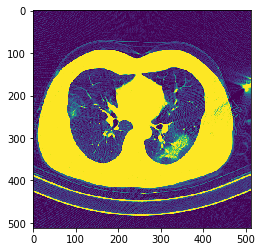

In [128]:
# check
t_p = glob.glob('/data/Data/3D/COVID19/npy/*.npy')
a = np.load(t_p[100])
print(a.shape)
# print(a)
import matplotlib.pyplot as plt
plt.imshow(np.reshape(a[0,:,:,0], [512, 512]))
plt.show()

/data/Data/3D/Normal/npy/1668_778.npy
(4, 512, 512, 3)


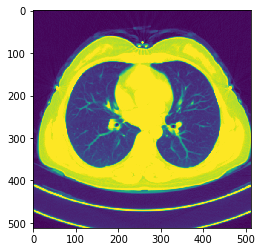

In [149]:
t_p = glob.glob('/data/Data/3D/Normal/npy/*.npy')
i =1
print(t_p[i])
a = np.load(t_p[i])
print(a.shape)
# print(a)
import matplotlib.pyplot as plt
plt.imshow(np.reshape(a[2,:,:,0], [512, 512]))
# plt.show()

In [86]:
!rm -rf /data/Data/3D/Data_split/COVID19
!rm -rf /data/Data/3D/Data_split/Normal
!rm -rf /data/Data/3D/Data_split/CP

!mkdir -p /data/Data/3D/Data_split/COVID19
!mkdir -p /data/Data/3D/Data_split/Normal
!mkdir -p /data/Data/3D/Data_split/CP

In [87]:
# 创建 txt 文件
import glob
import numpy as np
root_path = '/data/Data/3D'
COVID_path = '/data/Data/3D/Data_split/COVID19'
Normal_path = '/data/Data/3D/Data_split/Normal'
data_split = '/data/Data/3D/Data_split/'
split = ['train', 'val', 'test']
cls = ['COVID19', 'Normal','CP']

for c in cls:
    dst_dir = os.path.join(data_split, c)
    src_list = sorted(glob.glob(os.path.join(root_path, c,'npy') + "/*.npy"))
    print(src_list)
    # 用于划分train/val/test集合
    l = len(src_list)
    split_train = int(np.floor(0.7 * l))
    split_val = int(np.floor(0.9 * l))
    count = 0
    for file in src_list:
        if count < split_train:
#             print('train')
            file_path = os.path.join(dst_dir, c + '_' + split[0] + '.txt')
        elif split_train <= count < split_val:
#             print('val')
            file_path = os.path.join(dst_dir, c + '_' + split[1] + '.txt')
        elif split_val <= count:
#             print('test')
            file_path = os.path.join(dst_dir, c + '_' + split[2] + '.txt')
        fresult = open(file_path,'a') # 注意是: 追加
        fresult.writelines(file+'\n')
        fresult.close()
        count += 1

['/data/Data/3D/COVID19/npy/100_1337.npy', '/data/Data/3D/COVID19/npy/101_1339.npy', '/data/Data/3D/COVID19/npy/102_1341.npy', '/data/Data/3D/COVID19/npy/103_1343.npy', '/data/Data/3D/COVID19/npy/104_1345.npy', '/data/Data/3D/COVID19/npy/105_1347.npy', '/data/Data/3D/COVID19/npy/106_1349.npy', '/data/Data/3D/COVID19/npy/107_1351.npy', '/data/Data/3D/COVID19/npy/108_1353.npy', '/data/Data/3D/COVID19/npy/109_1355.npy', '/data/Data/3D/COVID19/npy/111_1363.npy', '/data/Data/3D/COVID19/npy/112_1365.npy', '/data/Data/3D/COVID19/npy/113_1367.npy', '/data/Data/3D/COVID19/npy/114_1369.npy', '/data/Data/3D/COVID19/npy/115_1371.npy', '/data/Data/3D/COVID19/npy/116_1373.npy', '/data/Data/3D/COVID19/npy/117_1375.npy', '/data/Data/3D/COVID19/npy/118_1377.npy', '/data/Data/3D/COVID19/npy/119_1379.npy', '/data/Data/3D/COVID19/npy/120_1381.npy', '/data/Data/3D/COVID19/npy/121_1383.npy', '/data/Data/3D/COVID19/npy/122_1385.npy', '/data/Data/3D/COVID19/npy/123_1387.npy', '/data/Data/3D/COVID19/npy/124_13

# 2D dataset

In [26]:
# os.path.join('/data/Data', '/data/Data/Data_split')

'/data/Data/Data_split'

In [88]:
path = '/data/Data'
import os
import glob

file_paths = glob.glob(os.path.join(path, '*.zip'))
print(file_paths)

['/data/Data/COVID19-16.zip', '/data/Data/Normal-1.zip', '/data/Data/Normal-2.zip', '/data/Data/Normal-3.zip', '/data/Data/Normal-6.zip', '/data/Data/Normal-7.zip', '/data/Data/Normal-8.zip', '/data/Data/Normal-9.zip', '/data/Data/Normal-13.zip', '/data/Data/Normal-15.zip', '/data/Data/Normal-11.zip', '/data/Data/Normal-17.zip']


In [89]:
# !rm -rf /data/Data/CP
# !rm -rf /data/Data/Normal
# !rm -rf /data/Data/COVID19
# !mkdir /data/Data/CP
# !mkdir /data/Data/Normal
# !mkdir /data/Data/COVID19

In [90]:
import zipfile

d = {}
for p in file_paths:
    
    # 1. form dst_dir path
    # class-id.zip
    file_name = p.split('/')[-1]
    # class-id
    c_id = file_name.split('.')[0]
    # class
    c = c_id.split('-')[0]
    dst_dir = os.path.join(path, c)
#     print('dst_dir:\t', dst_dir)
    
    # 2. 
    n_slice = 1
    r = zipfile.is_zipfile(p)
    if r:    
        fz = zipfile.ZipFile(p, 'r')
        for member in sorted(fz.namelist()):
            if ".png" not in member:
                continue
            else:
                file_c, pid, sid, idx = member.split('/')
                idx = idx.split('.')[0]
                scan_name = pid + '_' + sid
                filename = scan_name + '_' + idx + '.png'
                print(filename)
                key = pid + '_' + sid 
                if key not in d.keys():
                    d[key] = []
                d[key].append(filename)
    else:
        print(f'{p} is not zip')
    # get src_dir path

43_1219_0000.png
43_1219_0001.png
43_1219_0002.png
43_1219_0003.png
43_1219_0004.png
43_1219_0005.png
43_1219_0006.png
43_1219_0007.png
43_1219_0008.png
43_1219_0009.png
43_1219_0010.png
43_1219_0011.png
43_1219_0012.png
43_1219_0013.png
43_1219_0014.png
43_1219_0015.png
43_1219_0016.png
43_1219_0017.png
43_1219_0018.png
43_1219_0019.png
43_1219_0020.png
43_1219_0021.png
43_1219_0022.png
43_1219_0023.png
43_1219_0024.png
43_1219_0025.png
43_1219_0026.png
43_1219_0027.png
43_1219_0028.png
43_1219_0029.png
43_1219_0030.png
43_1219_0031.png
43_1219_0032.png
43_1219_0033.png
43_1219_0034.png
43_1219_0035.png
43_1219_0036.png
43_1219_0037.png
43_1219_0038.png
43_1219_0039.png
43_1219_0040.png
43_1219_0041.png
43_1219_0042.png
43_1219_0043.png
43_1219_0044.png
43_1219_0045.png
43_1219_0046.png
43_1219_0047.png
43_1219_0048.png
43_1219_0049.png
43_1219_0050.png
43_1219_0051.png
43_1219_0052.png
43_1219_0053.png
43_1219_0054.png
43_1219_0055.png
43_1219_0056.png
43_1219_0057.png
43_1219_0058.p

44_1221_0078.png
44_1221_0079.png
44_1221_0080.png
44_1221_0081.png
44_1221_0082.png
44_1221_0083.png
44_1221_0084.png
44_1221_0085.png
44_1221_0086.png
44_1221_0087.png
44_1221_0088.png
44_1221_0089.png
44_1221_0090.png
44_1221_0091.png
44_1221_0092.png
44_1221_0093.png
44_1221_0094.png
44_1221_0095.png
44_1221_0096.png
44_1221_0097.png
44_1221_0098.png
44_1221_0099.png
44_1221_0100.png
44_1221_0101.png
44_1221_0102.png
44_1221_0103.png
44_1221_0104.png
44_1221_0105.png
44_1221_0106.png
44_1221_0107.png
44_1221_0108.png
44_1221_0109.png
44_1221_0110.png
44_1221_0111.png
44_1221_0112.png
44_1221_0113.png
44_1221_0114.png
44_1221_0115.png
44_1221_0116.png
44_1221_0117.png
44_1221_0118.png
44_1221_0119.png
44_1221_0120.png
44_1221_0121.png
44_1221_0122.png
44_1221_0123.png
44_1222_0000.png
44_1222_0001.png
44_1222_0002.png
44_1222_0003.png
44_1222_0004.png
44_1222_0005.png
44_1222_0006.png
44_1222_0007.png
44_1222_0008.png
44_1222_0009.png
44_1222_0010.png
44_1222_0011.png
44_1222_0012.p

449_2053_0059.png
449_2053_0060.png
45_1223_0000.png
45_1223_0001.png
45_1223_0002.png
45_1223_0003.png
45_1223_0004.png
45_1223_0005.png
45_1223_0006.png
45_1223_0007.png
45_1223_0008.png
45_1223_0009.png
45_1223_0010.png
45_1223_0011.png
45_1223_0012.png
45_1223_0013.png
45_1223_0014.png
45_1223_0015.png
45_1223_0016.png
45_1223_0017.png
45_1223_0018.png
45_1223_0019.png
45_1223_0020.png
45_1223_0021.png
45_1223_0022.png
45_1223_0023.png
45_1223_0024.png
45_1223_0025.png
45_1223_0026.png
45_1223_0027.png
45_1223_0028.png
45_1223_0029.png
45_1223_0030.png
45_1223_0031.png
45_1223_0032.png
45_1223_0033.png
45_1223_0034.png
45_1223_0035.png
45_1223_0036.png
45_1223_0037.png
45_1223_0038.png
45_1223_0039.png
45_1223_0040.png
45_1223_0041.png
45_1223_0042.png
45_1223_0043.png
45_1223_0044.png
45_1223_0045.png
45_1223_0046.png
45_1223_0047.png
45_1223_0048.png
45_1223_0049.png
45_1223_0050.png
45_1223_0051.png
45_1223_0052.png
45_1223_0053.png
45_1223_0054.png
45_1223_0055.png
45_1223_0056

1668_778_0000.png
1668_778_0001.png
1668_778_0002.png
1668_778_0003.png
1668_778_0004.png
1668_778_0005.png
1668_778_0006.png
1668_778_0007.png
1668_778_0008.png
1668_778_0009.png
1668_778_0010.png
1668_778_0011.png
1668_778_0012.png
1668_778_0013.png
1668_778_0014.png
1668_778_0015.png
1668_778_0016.png
1668_778_0017.png
1668_778_0018.png
1668_778_0019.png
1668_778_0020.png
1668_778_0021.png
1668_778_0022.png
1668_778_0023.png
1668_778_0024.png
1668_778_0025.png
1668_778_0026.png
1668_778_0027.png
1668_778_0028.png
1668_778_0029.png
1668_778_0030.png
1668_778_0031.png
1668_778_0032.png
1668_778_0033.png
1668_778_0034.png
1668_778_0035.png
1668_778_0036.png
1668_778_0037.png
1668_778_0038.png
1668_778_0039.png
1668_778_0040.png
1668_778_0041.png
1668_778_0042.png
1668_778_0043.png
1668_778_0044.png
1668_778_0045.png
1668_778_0046.png
1668_778_0047.png
1668_778_0048.png
1668_778_0049.png
1668_778_0050.png
1668_778_0051.png
1668_778_0052.png
1668_778_0053.png
1668_778_0054.png
1668_778_0

1673_807_0081.png
1673_807_0082.png
1673_807_0083.png
1673_807_0084.png
1673_807_0085.png
1673_807_0086.png
1673_807_0087.png
1673_807_0088.png
1673_807_0089.png
1673_807_0090.png
1673_807_0091.png
1673_807_0092.png
1673_807_0093.png
1673_807_0094.png
1673_807_0095.png
1673_807_0096.png
1673_807_0097.png
1673_807_0098.png
1673_807_0099.png
1673_807_0100.png
1673_807_0101.png
1673_807_0102.png
1673_807_0103.png
1673_807_0104.png
1673_807_0105.png
1673_807_0106.png
1673_807_0107.png
1673_807_0108.png
1673_807_0109.png
1673_807_0110.png
1673_807_0111.png
1673_807_0112.png
1673_807_0113.png
1673_807_0114.png
1673_807_0115.png
1673_807_0116.png
1673_807_0117.png
1673_807_0118.png
1673_807_0119.png
1673_807_0120.png
1673_807_0121.png
1673_807_0122.png
1673_807_0123.png
1673_807_0124.png
1673_807_0125.png
1673_807_0126.png
1673_807_0127.png
1673_807_0128.png
1673_807_0129.png
1673_807_0130.png
1673_807_0131.png
1673_807_0132.png
1673_807_0133.png
1673_807_0134.png
1673_807_0135.png
1673_807_0

1680_842_0065.png
1680_842_0066.png
1680_842_0067.png
1680_842_0068.png
1680_843_0000.png
1680_843_0001.png
1680_843_0002.png
1680_843_0003.png
1680_843_0004.png
1680_843_0005.png
1680_843_0006.png
1680_843_0007.png
1680_843_0008.png
1680_843_0009.png
1680_843_0010.png
1680_843_0011.png
1680_843_0012.png
1680_843_0013.png
1680_843_0014.png
1680_843_0015.png
1680_843_0016.png
1680_843_0017.png
1680_843_0018.png
1680_843_0019.png
1680_843_0020.png
1680_843_0021.png
1680_843_0022.png
1680_843_0023.png
1680_843_0024.png
1680_843_0025.png
1680_843_0026.png
1680_843_0027.png
1680_843_0028.png
1680_843_0029.png
1680_843_0030.png
1680_843_0031.png
1680_843_0032.png
1680_843_0033.png
1680_843_0034.png
1680_843_0035.png
1680_843_0036.png
1680_843_0037.png
1680_843_0038.png
1680_843_0039.png
1680_843_0040.png
1680_843_0041.png
1680_843_0042.png
1680_843_0043.png
1680_843_0044.png
1680_843_0045.png
1680_843_0046.png
1680_843_0047.png
1680_843_0048.png
1680_843_0049.png
1680_843_0050.png
1680_843_0

1703_960_0065.png
1703_960_0066.png
1703_960_0067.png
1703_960_0068.png
1703_960_0069.png
1704_961_0000.png
1704_961_0001.png
1704_961_0002.png
1704_961_0003.png
1704_961_0004.png
1704_961_0005.png
1704_961_0006.png
1704_961_0007.png
1704_961_0008.png
1704_961_0009.png
1704_961_0010.png
1704_961_0011.png
1704_961_0012.png
1704_961_0013.png
1704_961_0014.png
1704_961_0015.png
1704_961_0016.png
1704_961_0017.png
1704_961_0018.png
1704_961_0019.png
1704_961_0020.png
1704_961_0021.png
1704_961_0022.png
1704_961_0023.png
1704_961_0024.png
1704_961_0025.png
1704_961_0026.png
1704_961_0027.png
1704_961_0028.png
1704_961_0029.png
1704_961_0030.png
1704_961_0031.png
1704_961_0032.png
1704_961_0033.png
1704_961_0034.png
1704_961_0035.png
1704_961_0036.png
1704_961_0037.png
1704_961_0038.png
1704_961_0039.png
1704_961_0040.png
1704_961_0041.png
1704_961_0042.png
1704_961_0043.png
1704_961_0044.png
1704_961_0045.png
1704_961_0046.png
1704_961_0047.png
1704_961_0048.png
1704_961_0049.png
1704_961_0

1721_1000_0022.png
1721_1000_0023.png
1721_1000_0024.png
1721_1000_0025.png
1721_1000_0026.png
1721_1000_0027.png
1721_1000_0028.png
1721_1000_0029.png
1721_1000_0030.png
1721_1000_0031.png
1721_1000_0032.png
1721_1000_0033.png
1721_1000_0034.png
1721_1000_0035.png
1721_1000_0036.png
1721_1000_0037.png
1721_1000_0038.png
1721_1000_0039.png
1721_1000_0040.png
1721_1000_0041.png
1721_1000_0042.png
1721_1000_0043.png
1721_1000_0044.png
1721_1000_0045.png
1721_1000_0046.png
1721_1000_0047.png
1721_1000_0048.png
1721_1000_0049.png
1721_1000_0050.png
1721_1000_0051.png
1721_1000_0052.png
1721_1000_0053.png
1721_1000_0054.png
1721_1000_0055.png
1721_1000_0056.png
1721_1000_0057.png
1721_1000_0058.png
1721_1000_0059.png
1721_1000_0060.png
1721_1000_0061.png
1721_1000_0062.png
1721_1000_0063.png
1721_1000_0064.png
1721_1000_0065.png
1721_1000_0066.png
1721_1000_0067.png
1721_1000_0068.png
1721_1000_0069.png
1721_1000_0070.png
1721_1000_0071.png
1721_1000_0072.png
1721_1000_0073.png
1721_1000_00

1729_1017_0071.png
1729_1017_0072.png
1729_1017_0073.png
1729_1018_0000.png
1729_1018_0001.png
1729_1018_0002.png
1729_1018_0003.png
1729_1018_0004.png
1729_1018_0005.png
1729_1018_0006.png
1729_1018_0007.png
1729_1018_0008.png
1729_1018_0009.png
1729_1018_0010.png
1729_1018_0011.png
1729_1018_0012.png
1729_1018_0013.png
1729_1018_0014.png
1729_1018_0015.png
1729_1018_0016.png
1729_1018_0017.png
1729_1018_0018.png
1729_1018_0019.png
1729_1018_0020.png
1729_1018_0021.png
1729_1018_0022.png
1729_1018_0023.png
1729_1018_0024.png
1729_1018_0025.png
1729_1018_0026.png
1729_1018_0027.png
1729_1018_0028.png
1729_1018_0029.png
1729_1018_0030.png
1729_1018_0031.png
1729_1018_0032.png
1729_1018_0033.png
1729_1018_0034.png
1729_1018_0035.png
1729_1018_0036.png
1729_1018_0037.png
1729_1018_0038.png
1729_1018_0039.png
1729_1018_0040.png
1729_1018_0041.png
1729_1018_0042.png
1729_1018_0043.png
1729_1018_0044.png
1729_1018_0045.png
1729_1018_0046.png
1729_1018_0047.png
1729_1018_0048.png
1729_1018_00

1732_1025_0000.png
1732_1025_0001.png
1732_1025_0002.png
1732_1025_0003.png
1732_1025_0004.png
1732_1025_0005.png
1732_1025_0006.png
1732_1025_0007.png
1732_1025_0008.png
1732_1025_0009.png
1732_1025_0010.png
1732_1025_0011.png
1732_1025_0012.png
1732_1025_0013.png
1732_1025_0014.png
1732_1025_0015.png
1732_1025_0016.png
1732_1025_0017.png
1732_1025_0018.png
1732_1025_0019.png
1732_1025_0020.png
1732_1025_0021.png
1732_1025_0022.png
1732_1025_0023.png
1732_1025_0024.png
1732_1025_0025.png
1732_1025_0026.png
1732_1025_0027.png
1732_1025_0028.png
1732_1025_0029.png
1732_1025_0030.png
1732_1025_0031.png
1732_1025_0032.png
1732_1025_0033.png
1732_1025_0034.png
1732_1025_0035.png
1732_1025_0036.png
1732_1025_0037.png
1732_1025_0038.png
1732_1025_0039.png
1732_1025_0040.png
1732_1025_0041.png
1732_1025_0042.png
1732_1025_0043.png
1732_1025_0044.png
1732_1025_0045.png
1732_1025_0046.png
1732_1025_0047.png
1732_1025_0048.png
1732_1025_0049.png
1732_1025_0050.png
1732_1025_0051.png
1732_1025_00

1742_1055_0056.png
1742_1055_0057.png
1742_1055_0058.png
1742_1055_0059.png
1743_1056_0000.png
1743_1056_0001.png
1743_1056_0002.png
1743_1056_0003.png
1743_1056_0004.png
1743_1056_0005.png
1743_1056_0006.png
1743_1056_0007.png
1743_1056_0008.png
1743_1056_0009.png
1743_1056_0010.png
1743_1056_0011.png
1743_1056_0012.png
1743_1056_0013.png
1743_1056_0014.png
1743_1056_0015.png
1743_1056_0016.png
1743_1056_0017.png
1743_1056_0018.png
1743_1056_0019.png
1743_1056_0020.png
1743_1056_0021.png
1743_1056_0022.png
1743_1056_0023.png
1743_1056_0024.png
1743_1056_0025.png
1743_1056_0026.png
1743_1056_0027.png
1743_1056_0028.png
1743_1056_0029.png
1743_1056_0030.png
1743_1056_0031.png
1743_1056_0032.png
1743_1056_0033.png
1743_1056_0034.png
1743_1056_0035.png
1743_1056_0036.png
1743_1056_0037.png
1743_1056_0038.png
1743_1056_0039.png
1743_1056_0040.png
1743_1056_0041.png
1743_1056_0042.png
1743_1056_0043.png
1743_1056_0044.png
1743_1056_0045.png
1743_1056_0046.png
1743_1056_0047.png
1743_1056_00

1753_1092_0007.png
1753_1092_0008.png
1753_1092_0009.png
1753_1092_0010.png
1753_1092_0011.png
1753_1092_0012.png
1753_1092_0013.png
1753_1092_0014.png
1753_1092_0015.png
1753_1092_0016.png
1753_1092_0017.png
1753_1092_0018.png
1753_1092_0019.png
1753_1092_0020.png
1753_1092_0021.png
1753_1092_0022.png
1753_1092_0023.png
1753_1092_0024.png
1753_1092_0025.png
1753_1092_0026.png
1753_1092_0027.png
1753_1092_0028.png
1753_1092_0029.png
1753_1092_0030.png
1753_1092_0031.png
1753_1092_0032.png
1753_1092_0033.png
1753_1092_0034.png
1753_1092_0035.png
1753_1092_0036.png
1753_1092_0037.png
1753_1092_0038.png
1753_1092_0039.png
1753_1092_0040.png
1753_1092_0041.png
1753_1092_0042.png
1753_1092_0043.png
1753_1092_0044.png
1753_1092_0045.png
1753_1092_0046.png
1753_1092_0047.png
1753_1092_0048.png
1753_1092_0049.png
1753_1092_0050.png
1753_1092_0051.png
1753_1092_0052.png
1753_1092_0053.png
1753_1092_0054.png
1753_1092_0055.png
1753_1092_0056.png
1753_1092_0057.png
1753_1092_0058.png
1753_1092_00

1759_1117_0030.png
1759_1117_0031.png
1759_1117_0032.png
1759_1117_0033.png
1759_1117_0034.png
1759_1117_0035.png
1759_1117_0036.png
1759_1117_0037.png
1759_1117_0038.png
1759_1117_0039.png
1759_1117_0040.png
1759_1117_0041.png
1759_1117_0042.png
1759_1117_0043.png
1759_1117_0044.png
1759_1117_0045.png
1759_1117_0046.png
1759_1117_0047.png
1759_1117_0048.png
1759_1117_0049.png
1759_1117_0050.png
1759_1117_0051.png
1759_1117_0052.png
1759_1117_0053.png
1759_1117_0054.png
1759_1117_0055.png
1759_1117_0056.png
1759_1117_0057.png
1759_1117_0058.png
1759_1117_0059.png
1759_1117_0060.png
1759_1117_0061.png
1759_1117_0062.png
1759_1117_0063.png
1759_1117_0064.png
1759_1118_0000.png
1759_1118_0001.png
1759_1118_0002.png
1759_1118_0003.png
1759_1118_0004.png
1759_1118_0005.png
1759_1118_0006.png
1759_1118_0007.png
1759_1118_0008.png
1759_1118_0009.png
1759_1118_0010.png
1759_1118_0011.png
1759_1118_0012.png
1759_1118_0013.png
1759_1118_0014.png
1759_1118_0015.png
1759_1118_0016.png
1759_1118_00

1764_1143_0000.png
1764_1143_0001.png
1764_1143_0002.png
1764_1143_0003.png
1764_1143_0004.png
1764_1143_0005.png
1764_1143_0006.png
1764_1143_0007.png
1764_1143_0008.png
1764_1143_0009.png
1764_1143_0010.png
1764_1143_0011.png
1764_1143_0012.png
1764_1143_0013.png
1764_1143_0014.png
1764_1143_0015.png
1764_1143_0016.png
1764_1143_0017.png
1764_1143_0018.png
1764_1143_0019.png
1764_1143_0020.png
1764_1143_0021.png
1764_1143_0022.png
1764_1143_0023.png
1764_1143_0024.png
1764_1143_0025.png
1764_1143_0026.png
1764_1143_0027.png
1764_1143_0028.png
1764_1143_0029.png
1764_1143_0030.png
1764_1143_0031.png
1764_1143_0032.png
1764_1143_0033.png
1764_1143_0034.png
1764_1143_0035.png
1764_1143_0036.png
1764_1143_0037.png
1764_1143_0038.png
1764_1143_0039.png
1764_1143_0040.png
1764_1143_0041.png
1764_1143_0042.png
1764_1143_0043.png
1764_1143_0044.png
1764_1143_0045.png
1764_1143_0046.png
1764_1143_0047.png
1764_1143_0048.png
1764_1143_0049.png
1764_1143_0050.png
1764_1143_0051.png
1764_1143_00

745_180_0098.png
745_180_0099.png
745_180_0100.png
745_180_0101.png
745_180_0102.png
745_180_0103.png
745_180_0104.png
746_181_0000.png
746_181_0001.png
746_181_0002.png
746_181_0003.png
746_181_0004.png
746_181_0005.png
746_181_0006.png
746_181_0007.png
746_181_0008.png
746_181_0009.png
746_181_0010.png
746_181_0011.png
746_181_0012.png
746_181_0013.png
746_181_0014.png
746_181_0015.png
746_181_0016.png
746_181_0017.png
746_181_0018.png
746_181_0019.png
746_181_0020.png
746_181_0021.png
746_181_0022.png
746_181_0023.png
746_181_0024.png
746_181_0025.png
746_181_0026.png
746_181_0027.png
746_181_0028.png
746_181_0029.png
746_181_0030.png
746_181_0031.png
746_181_0032.png
746_181_0033.png
746_181_0034.png
746_181_0035.png
746_181_0036.png
746_181_0037.png
746_181_0038.png
746_181_0039.png
746_181_0040.png
746_181_0041.png
746_181_0042.png
746_181_0043.png
746_181_0044.png
746_181_0045.png
746_181_0046.png
746_181_0047.png
746_181_0048.png
746_181_0049.png
746_181_0050.png
746_181_0051.p

759_194_0057.png
759_194_0058.png
759_194_0059.png
759_194_0060.png
759_194_0061.png
759_194_0062.png
759_194_0063.png
759_194_0064.png
759_194_0065.png
759_194_0066.png
759_194_0067.png
759_194_0068.png
759_194_0069.png
759_194_0070.png
759_194_0071.png
759_194_0072.png
759_194_0073.png
759_194_0074.png
759_194_0075.png
759_194_0076.png
759_194_0077.png
759_194_0078.png
759_194_0079.png
759_194_0080.png
759_194_0081.png
759_194_0082.png
759_194_0083.png
759_194_0084.png
759_194_0085.png
759_194_0086.png
759_194_0087.png
759_194_0088.png
759_194_0089.png
759_194_0090.png
759_194_0091.png
759_194_0092.png
759_194_0093.png
759_194_0094.png
759_194_0095.png
759_194_0096.png
759_194_0097.png
759_194_0098.png
759_194_0099.png
759_194_0100.png
759_194_0101.png
759_194_0102.png
759_194_0103.png
759_194_0104.png
759_194_0105.png
759_194_0106.png
759_194_0107.png
759_194_0108.png
759_194_0109.png
759_194_0110.png
759_194_0111.png
759_194_0112.png
759_194_0113.png
759_194_0114.png
759_194_0115.p

1797_252_0000.png
1797_252_0001.png
1797_252_0002.png
1797_252_0003.png
1797_252_0004.png
1797_252_0005.png
1797_252_0006.png
1797_252_0007.png
1797_252_0008.png
1797_252_0009.png
1797_252_0010.png
1797_252_0011.png
1797_252_0012.png
1797_252_0013.png
1797_252_0014.png
1797_252_0015.png
1797_252_0016.png
1797_252_0017.png
1797_252_0018.png
1797_252_0019.png
1797_252_0020.png
1797_252_0021.png
1797_252_0022.png
1797_252_0023.png
1797_252_0024.png
1797_252_0025.png
1797_252_0026.png
1797_252_0027.png
1797_252_0028.png
1797_252_0029.png
1797_252_0030.png
1797_252_0031.png
1797_252_0032.png
1797_252_0033.png
1797_252_0034.png
1797_252_0035.png
1797_252_0036.png
1797_252_0037.png
1797_252_0038.png
1797_252_0039.png
1797_252_0040.png
1797_252_0041.png
1797_252_0042.png
1797_252_0043.png
1797_252_0044.png
1797_252_0045.png
1797_252_0046.png
1797_252_0047.png
1797_252_0048.png
1797_252_0049.png
1797_252_0050.png
1797_252_0051.png
1797_252_0052.png
1797_252_0053.png
1797_252_0054.png
1797_252_0

1821_276_0018.png
1821_276_0019.png
1821_276_0020.png
1821_276_0021.png
1821_276_0022.png
1821_276_0023.png
1821_276_0024.png
1821_276_0025.png
1821_276_0026.png
1821_276_0027.png
1821_276_0028.png
1821_276_0029.png
1821_276_0030.png
1821_276_0031.png
1821_276_0032.png
1821_276_0033.png
1821_276_0034.png
1821_276_0035.png
1821_276_0036.png
1821_276_0037.png
1821_276_0038.png
1821_276_0039.png
1821_276_0040.png
1821_276_0041.png
1821_276_0042.png
1821_276_0043.png
1821_276_0044.png
1821_276_0045.png
1821_276_0046.png
1821_276_0047.png
1821_276_0048.png
1821_276_0049.png
1821_276_0050.png
1821_276_0051.png
1821_276_0052.png
1821_276_0053.png
1821_276_0054.png
1821_276_0055.png
1821_276_0056.png
1821_276_0057.png
1821_276_0058.png
1821_276_0059.png
1821_276_0060.png
1821_276_0061.png
1821_276_0062.png
1821_276_0063.png
1821_276_0064.png
1821_276_0065.png
1821_276_0066.png
1821_276_0067.png
1821_276_0068.png
1821_276_0069.png
1821_276_0070.png
1821_276_0071.png
1821_276_0072.png
1821_276_0

1831_286_0095.png
1831_286_0096.png
1831_286_0097.png
1831_286_0098.png
1832_287_0000.png
1832_287_0001.png
1832_287_0002.png
1832_287_0003.png
1832_287_0004.png
1832_287_0005.png
1832_287_0006.png
1832_287_0007.png
1832_287_0008.png
1832_287_0009.png
1832_287_0010.png
1832_287_0011.png
1832_287_0012.png
1832_287_0013.png
1832_287_0014.png
1832_287_0015.png
1832_287_0016.png
1832_287_0017.png
1832_287_0018.png
1832_287_0019.png
1832_287_0020.png
1832_287_0021.png
1832_287_0022.png
1832_287_0023.png
1832_287_0024.png
1832_287_0025.png
1832_287_0026.png
1832_287_0027.png
1832_287_0028.png
1832_287_0029.png
1832_287_0030.png
1832_287_0031.png
1832_287_0032.png
1832_287_0033.png
1832_287_0034.png
1832_287_0035.png
1832_287_0036.png
1832_287_0037.png
1832_287_0038.png
1832_287_0039.png
1832_287_0040.png
1832_287_0041.png
1832_287_0042.png
1832_287_0043.png
1832_287_0044.png
1832_287_0045.png
1832_287_0046.png
1832_287_0047.png
1832_287_0048.png
1832_287_0049.png
1832_287_0050.png
1832_287_0

1857_312_0039.png
1857_312_0040.png
1857_312_0041.png
1857_312_0042.png
1857_312_0043.png
1857_312_0044.png
1857_312_0045.png
1857_312_0046.png
1857_312_0047.png
1857_312_0048.png
1857_312_0049.png
1857_312_0050.png
1857_312_0051.png
1857_312_0052.png
1857_312_0053.png
1857_312_0054.png
1857_312_0055.png
1857_312_0056.png
1857_312_0057.png
1857_312_0058.png
1857_312_0059.png
1857_312_0060.png
1857_312_0061.png
1857_312_0062.png
1857_312_0063.png
1857_312_0064.png
1857_312_0065.png
1857_312_0066.png
1857_312_0067.png
1857_312_0068.png
1857_312_0069.png
1857_312_0070.png
1857_312_0071.png
1857_312_0072.png
1857_312_0073.png
1857_312_0074.png
1857_312_0075.png
1857_312_0076.png
1857_312_0077.png
1857_312_0078.png
1857_312_0079.png
1858_313_0000.png
1858_313_0001.png
1858_313_0002.png
1858_313_0003.png
1858_313_0004.png
1858_313_0005.png
1858_313_0006.png
1858_313_0007.png
1858_313_0008.png
1858_313_0009.png
1858_313_0010.png
1858_313_0011.png
1858_313_0012.png
1858_313_0013.png
1858_313_0

1880_335_0009.png
1880_335_0010.png
1880_335_0011.png
1880_335_0012.png
1880_335_0013.png
1880_335_0014.png
1880_335_0015.png
1880_335_0016.png
1880_335_0017.png
1880_335_0018.png
1880_335_0019.png
1880_335_0020.png
1880_335_0021.png
1880_335_0022.png
1880_335_0023.png
1880_335_0024.png
1880_335_0025.png
1880_335_0026.png
1880_335_0027.png
1880_335_0028.png
1880_335_0029.png
1880_335_0030.png
1880_335_0031.png
1880_335_0032.png
1880_335_0033.png
1880_335_0034.png
1880_335_0035.png
1880_335_0036.png
1880_335_0037.png
1880_335_0038.png
1880_335_0039.png
1880_335_0040.png
1880_335_0041.png
1880_335_0042.png
1880_335_0043.png
1880_335_0044.png
1880_335_0045.png
1880_335_0046.png
1880_335_0047.png
1880_335_0048.png
1880_335_0049.png
1880_335_0050.png
1880_335_0051.png
1880_335_0052.png
1880_335_0053.png
1880_335_0054.png
1880_335_0055.png
1880_335_0056.png
1880_335_0057.png
1880_335_0058.png
1880_335_0059.png
1880_335_0060.png
1880_335_0061.png
1880_335_0062.png
1880_335_0063.png
1880_335_0

1899_354_0012.png
1899_354_0013.png
1899_354_0014.png
1899_354_0015.png
1899_354_0016.png
1899_354_0017.png
1899_354_0018.png
1899_354_0019.png
1899_354_0020.png
1899_354_0021.png
1899_354_0022.png
1899_354_0023.png
1899_354_0024.png
1899_354_0025.png
1899_354_0026.png
1899_354_0027.png
1899_354_0028.png
1899_354_0029.png
1899_354_0030.png
1899_354_0031.png
1899_354_0032.png
1899_354_0033.png
1899_354_0034.png
1899_354_0035.png
1899_354_0036.png
1899_354_0037.png
1899_354_0038.png
1899_354_0039.png
1899_354_0040.png
1899_354_0041.png
1899_354_0042.png
1899_354_0043.png
1899_354_0044.png
1899_354_0045.png
1899_354_0046.png
1899_354_0047.png
1899_354_0048.png
1899_354_0049.png
1899_354_0050.png
1899_354_0051.png
1899_354_0052.png
1899_354_0053.png
1899_354_0054.png
1899_354_0055.png
1899_354_0056.png
1899_354_0057.png
1899_354_0058.png
1899_354_0059.png
1899_354_0060.png
1899_354_0061.png
1899_354_0062.png
1899_354_0063.png
1899_354_0064.png
1899_354_0065.png
1899_354_0066.png
1899_354_0

2034_489_0000.png
2034_489_0001.png
2034_489_0002.png
2034_489_0003.png
2034_489_0004.png
2034_489_0005.png
2034_489_0006.png
2034_489_0007.png
2034_489_0008.png
2034_489_0009.png
2034_489_0010.png
2034_489_0011.png
2034_489_0012.png
2034_489_0013.png
2034_489_0014.png
2034_489_0015.png
2034_489_0016.png
2034_489_0017.png
2034_489_0018.png
2034_489_0019.png
2034_489_0020.png
2034_489_0021.png
2034_489_0022.png
2034_489_0023.png
2034_489_0024.png
2034_489_0025.png
2034_489_0026.png
2034_489_0027.png
2034_489_0028.png
2034_489_0029.png
2034_489_0030.png
2034_489_0031.png
2034_489_0032.png
2034_489_0033.png
2034_489_0034.png
2034_489_0035.png
2034_489_0036.png
2034_489_0037.png
2034_489_0038.png
2034_489_0039.png
2034_489_0040.png
2034_489_0041.png
2034_489_0042.png
2034_489_0043.png
2034_489_0044.png
2034_489_0045.png
2034_489_0046.png
2034_489_0047.png
2034_489_0048.png
2034_489_0049.png
2034_489_0050.png
2034_489_0051.png
2034_489_0052.png
2034_489_0053.png
2034_489_0054.png
2034_489_0

2086_541_0000.png
2086_541_0001.png
2086_541_0002.png
2086_541_0003.png
2086_541_0004.png
2086_541_0005.png
2086_541_0006.png
2086_541_0007.png
2086_541_0008.png
2086_541_0009.png
2086_541_0010.png
2086_541_0011.png
2086_541_0012.png
2086_541_0013.png
2086_541_0014.png
2086_541_0015.png
2086_541_0016.png
2086_541_0017.png
2086_541_0018.png
2086_541_0019.png
2086_541_0020.png
2086_541_0021.png
2086_541_0022.png
2086_541_0023.png
2086_541_0024.png
2086_541_0025.png
2086_541_0026.png
2086_541_0027.png
2086_541_0028.png
2086_541_0029.png
2086_541_0030.png
2086_541_0031.png
2086_541_0032.png
2086_541_0033.png
2086_541_0034.png
2086_541_0035.png
2086_541_0036.png
2086_541_0037.png
2086_541_0038.png
2086_541_0039.png
2086_541_0040.png
2086_541_0041.png
2086_541_0042.png
2086_541_0043.png
2086_541_0044.png
2086_541_0045.png
2086_541_0046.png
2086_541_0047.png
2086_541_0048.png
2086_541_0049.png
2086_541_0050.png
2086_541_0051.png
2086_541_0052.png
2086_541_0053.png
2086_541_0054.png
2086_541_0

1964_419_0074.png
1964_419_0075.png
1964_419_0076.png
1964_419_0077.png
1964_419_0078.png
1964_419_0079.png
1964_419_0080.png
1964_419_0081.png
1964_419_0082.png
1964_419_0083.png
1964_419_0084.png
1964_419_0085.png
1964_419_0086.png
1964_419_0087.png
1964_419_0088.png
1964_419_0089.png
1964_419_0090.png
1964_419_0091.png
1964_419_0092.png
1964_419_0093.png
1964_419_0094.png
1964_419_0095.png
1964_419_0096.png
1964_419_0097.png
1964_419_0098.png
1964_419_0099.png
1965_420_0000.png
1965_420_0001.png
1965_420_0002.png
1965_420_0003.png
1965_420_0004.png
1965_420_0005.png
1965_420_0006.png
1965_420_0007.png
1965_420_0008.png
1965_420_0009.png
1965_420_0010.png
1965_420_0011.png
1965_420_0012.png
1965_420_0013.png
1965_420_0014.png
1965_420_0015.png
1965_420_0016.png
1965_420_0017.png
1965_420_0018.png
1965_420_0019.png
1965_420_0020.png
1965_420_0021.png
1965_420_0022.png
1965_420_0023.png
1965_420_0024.png
1965_420_0025.png
1965_420_0026.png
1965_420_0027.png
1965_420_0028.png
1965_420_0

1986_441_0029.png
1986_441_0030.png
1986_441_0031.png
1986_441_0032.png
1986_441_0033.png
1986_441_0034.png
1986_441_0035.png
1986_441_0036.png
1986_441_0037.png
1986_441_0038.png
1986_441_0039.png
1986_441_0040.png
1986_441_0041.png
1986_441_0042.png
1986_441_0043.png
1986_441_0044.png
1986_441_0045.png
1986_441_0046.png
1986_441_0047.png
1986_441_0048.png
1986_441_0049.png
1986_441_0050.png
1986_441_0051.png
1986_441_0052.png
1986_441_0053.png
1986_441_0054.png
1986_441_0055.png
1986_441_0056.png
1986_441_0057.png
1986_441_0058.png
1986_441_0059.png
1986_441_0060.png
1986_441_0061.png
1986_441_0062.png
1986_441_0063.png
1986_441_0064.png
1986_441_0065.png
1986_441_0066.png
1986_441_0067.png
1986_441_0068.png
1986_441_0069.png
1986_441_0070.png
1986_441_0071.png
1986_441_0072.png
1986_441_0073.png
1986_441_0074.png
1986_441_0075.png
1986_441_0076.png
1986_441_0077.png
1986_441_0078.png
1986_441_0079.png
1986_441_0080.png
1986_441_0081.png
1986_441_0082.png
1986_441_0083.png
1986_441_0

2172_627_0069.png
2172_627_0070.png
2172_627_0071.png
2172_627_0072.png
2172_627_0073.png
2172_627_0074.png
2172_627_0075.png
2172_627_0076.png
2172_627_0077.png
2172_627_0078.png
2172_627_0079.png
2172_627_0080.png
2172_627_0081.png
2172_627_0082.png
2172_627_0083.png
2172_627_0084.png
2172_627_0085.png
2172_627_0086.png
2172_627_0087.png
2172_627_0088.png
2172_627_0089.png
2172_627_0090.png
2173_628_0000.png
2173_628_0001.png
2173_628_0002.png
2173_628_0003.png
2173_628_0004.png
2173_628_0005.png
2173_628_0006.png
2173_628_0007.png
2173_628_0008.png
2173_628_0009.png
2173_628_0010.png
2173_628_0011.png
2173_628_0012.png
2173_628_0013.png
2173_628_0014.png
2173_628_0015.png
2173_628_0016.png
2173_628_0017.png
2173_628_0018.png
2173_628_0019.png
2173_628_0020.png
2173_628_0021.png
2173_628_0022.png
2173_628_0023.png
2173_628_0024.png
2173_628_0025.png
2173_628_0026.png
2173_628_0027.png
2173_628_0028.png
2173_628_0029.png
2173_628_0030.png
2173_628_0031.png
2173_628_0032.png
2173_628_0

In [91]:
import zipfile
import shutil
import numpy as np
classes = ['Normal', 'CP', 'COVID19']
# d = {}
filter_d = {}
for p in file_paths:
    
    # 1. form dst_dir path
    # class-id.zip
    file_name = p.split('/')[-1]
    # class-id
    c_id = file_name.split('.')[0]
    # class
    c = c_id.split('-')[0]
    dst_dir = os.path.join(path, c)
    print('dst_dir:\t', dst_dir)
    
    # 2. unzip and choose 1 core slice
    n_slice = 1
    r = zipfile.is_zipfile(p)
    if r:    
        fz = zipfile.ZipFile(p, 'r')
        for member in sorted(fz.namelist()):
            # 如果是文件夹的路径, 则不操作, 进入下一轮循环
            if ".png" not in member:
                continue
            else:
                # 如果是图片的路径, 对每个病人, 挑出一个检查中的最中心的图片
                file_c, pid, sid, idx = member.split('/')
                # 对每个病人, 去掉重复的检查结果
#                 print(f'pid: {pid}')
                # 如果该病人是第一次出现
                if pid not in filter_d.keys():
#                     print(f'{pid} not in keys')
                    # 0 表示该人还没有被挑出一张CT照片
                    filter_d[pid] = 0
                elif filter_d[pid] == 0:
                    
                    idx = idx.split('.')[0]
                    scan_name = pid + '_' + sid
                    filename = scan_name + '_' + idx + '.png'
                    key = pid + '_' + sid 
                    l = int(np.floor(len(d[key]) /2))
#                     print(l)
                    print(idx)
                    median_idx = str(l).zfill(4)
#                     print(median_idx)
                    if idx == median_idx:
                        # 1 表示该人已经被挑出了一张CT照片
                        filter_d[pid] = 1
                        print(filename)
                        dst = os.path.join(dst_dir, filename) 
                        print(dst)
                        source = fz.open(member)
                        target = open(dst, "wb")
                        with source, target:
                            shutil.copyfileobj(source, target)
                
    else:
        print('This is not zip')
    # get src_dir path

dst_dir:	 /data/Data/COVID19
0001
0002
0003
0004
0005
0006
0007
0008
0009
0010
0011
0012
0013
0014
0015
0016
0017
0018
0019
0020
0021
0022
0023
0024
0025
0026
0027
0028
0029
0030
0031
0032
0033
0034
0035
0036
0037
0038
0039
0040
0041
0042
0043
0044
0045
0046
0047
0048
0049
0050
0051
0052
0053
0054
0055
0056
0057
0058
0059
0060
0061
0062
0063
0064
0065
0066
0067
0068
0069
0070
0071
0072
0073
0074
0075
0076
0077
0078
43_1219_0078.png
/data/Data/COVID19/43_1219_0078.png
0001
0002
0003
0004
0005
0006
0007
0008
0009
0010
0011
0012
0013
0014
0015
0016
0017
0018
0019
0020
0021
0022
0023
0024
0025
0026
0027
0028
0029
0030
0031
0032
0033
0034
0035
0036
0037
0038
0039
0040
0041
0042
0043
0044
0045
0046
0047
0048
0049
0050
0051
0052
0053
0054
0055
0056
0057
0058
0059
0060
0061
0062
0063
0064
0065
0066
0067
0068
0069
0070
0071
0072
0073
0074
0075
0076
430_2013_0076.png
/data/Data/COVID19/430_2013_0076.png
0001
0002
0003
0004
0005
0006
0007
0008
0009
0010
0011
0012
0013
0014
0015
0016
0017
0018
001

0001
0002
0003
0004
0005
0006
0007
0008
0009
0010
0011
0012
0013
0014
0015
0016
0017
0018
0019
0020
0021
0022
0023
0024
0025
0026
0027
0028
0029
0030
0031
0032
0033
0034
0035
0036
0037
0038
0039
0040
0041
0042
0043
0044
0045
0046
0047
0048
0049
0050
0051
0052
0053
0054
0055
0056
0057
0058
0059
0060
0061
0062
0063
0064
0065
0066
0067
0068
0069
454_2062_0069.png
/data/Data/COVID19/454_2062_0069.png
0001
0002
0003
0004
0005
0006
0007
0008
0009
0010
0011
0012
0013
0014
0015
0016
0017
0018
0019
0020
0021
0022
0023
0024
0025
0026
0027
0028
0029
0030
0031
0032
0033
0034
0035
0036
0037
0038
0039
0040
0041
0042
0043
0044
0045
0046
0047
0048
0049
0050
0051
0052
0053
0054
0055
0056
0057
0058
0059
0060
0061
0062
0063
0064
0065
0066
455_2064_0066.png
/data/Data/COVID19/455_2064_0066.png
0001
0002
0003
0004
0005
0006
0007
0008
0009
0010
0011
0012
0013
0014
0015
0016
0017
0018
0019
0020
0021
0022
0023
0024
0025
0026
0027
0028
0029
0030
0031
0032
0033
0034
0035
0036
0037
0038
0039
0040
0041
0042
0043


0001
0002
0003
0004
0005
0006
0007
0008
0009
0010
0011
0012
0013
0014
0015
0016
0017
0018
1731_1024_0018.png
/data/Data/Normal/1731_1024_0018.png
dst_dir:	 /data/Data/Normal
0001
0002
0003
0004
0005
0006
0007
0008
0009
0010
0011
0012
0013
0014
0015
0016
0017
0018
0019
0020
0021
0022
0023
0024
0025
0026
0027
0028
0029
0030
0031
0032
0033
0034
0035
0036
1732_1025_0036.png
/data/Data/Normal/1732_1025_0036.png
0001
0002
0003
0004
0005
0006
0007
0008
0009
0010
0011
0012
0013
0014
0015
0016
0017
0018
0019
0020
0021
0022
0023
0024
0025
0026
0027
0028
0029
0030
0031
0032
0033
0034
0035
1733_1026_0035.png
/data/Data/Normal/1733_1026_0035.png
0001
0002
0003
0004
0005
0006
0007
0008
0009
0010
0011
0012
0013
0014
0015
0016
0017
0018
0019
0020
0021
0022
0023
0024
0025
0026
0027
0028
0029
0030
0031
0032
0033
1734_1028_0033.png
/data/Data/Normal/1734_1028_0033.png
0001
0002
0003
0004
0005
0006
0007
0008
0009
0010
0011
0012
0013
0014
0015
0016
0017
0018
0019
0020
0021
0022
0023
0024
0025
0026
0027
002

0001
0002
0003
0004
0005
0006
0007
0008
0009
0010
0011
0012
0013
0014
0015
0016
0017
0018
0019
0020
0021
0022
0023
0024
0025
0026
0027
0028
0029
0030
0031
0032
0033
1764_1143_0033.png
/data/Data/Normal/1764_1143_0033.png
0001
0002
0003
0004
0005
0006
0007
0008
0009
0010
0011
0012
0013
0014
0015
0016
0017
0018
0019
0020
0021
0022
0023
0024
0025
0026
0027
0028
0029
0030
1765_1147_0030.png
/data/Data/Normal/1765_1147_0030.png
0001
0002
0003
0004
0005
0006
0007
0008
0009
0010
0011
0012
0013
0014
0015
0016
0017
0018
0019
0020
0021
0022
0023
0024
0025
0026
0027
0028
0029
0030
1766_1149_0030.png
/data/Data/Normal/1766_1149_0030.png
0001
0002
0003
0004
0005
0006
0007
0008
0009
0010
0011
0012
0013
0014
0015
0016
0017
0018
0019
0020
0021
0022
0023
0024
0025
0026
0027
0028
0029
0030
0031
0032
0033
0034
1767_1152_0034.png
/data/Data/Normal/1767_1152_0034.png
0001
0002
0003
0004
0005
0006
0007
0008
0009
0010
0011
0012
0013
0014
0015
0016
0017
0018
0019
0020
0021
0022
0023
0024
0025
0026
0027
0028
0

dst_dir:	 /data/Data/Normal
0001
0002
0003
0004
0005
0006
0007
0008
0009
0010
0011
0012
0013
0014
0015
0016
0017
0018
0019
0020
0021
0022
0023
0024
0025
0026
0027
0028
0029
0030
0031
0032
0033
0034
0035
0036
0037
0038
0039
0040
0041
0042
1797_252_0042.png
/data/Data/Normal/1797_252_0042.png
0001
0002
0003
0004
0005
0006
0007
0008
0009
0010
0011
0012
0013
0014
0015
0016
0017
0018
0019
0020
0021
0022
0023
0024
0025
0026
0027
0028
0029
0030
0031
0032
0033
0034
0035
0036
0037
0038
0039
0040
0041
0042
0043
0044
0045
0046
1798_253_0046.png
/data/Data/Normal/1798_253_0046.png
0001
0002
0003
0004
0005
0006
0007
0008
0009
0010
0011
0012
0013
0014
0015
0016
0017
0018
0019
0020
0021
0022
0023
0024
0025
0026
0027
0028
0029
0030
0031
0032
0033
0034
0035
0036
0037
0038
0039
0040
0041
0042
0043
0044
0045
0046
0047
0048
1799_254_0048.png
/data/Data/Normal/1799_254_0048.png
0001
0002
0003
0004
0005
0006
0007
0008
0009
0010
0011
0012
0013
0014
0015
0016
0017
0018
0019
0020
0021
0022
0023
0024
0025
0026


0021
0022
0023
0024
0025
0026
0027
0028
0029
0030
0031
0032
0033
0034
0035
0036
0037
0038
0039
0040
0041
0042
0043
0044
0045
0046
0047
0048
0049
0050
0051
0052
1846_301_0052.png
/data/Data/Normal/1846_301_0052.png
0001
0002
0003
0004
0005
0006
0007
0008
0009
0010
0011
0012
0013
0014
0015
0016
0017
0018
0019
0020
0021
0022
0023
0024
0025
0026
0027
0028
0029
0030
0031
0032
0033
0034
0035
0036
0037
0038
0039
0040
0041
0042
0043
0044
0045
0046
0047
0048
0049
0050
0051
1847_302_0051.png
/data/Data/Normal/1847_302_0051.png
0001
0002
0003
0004
0005
0006
0007
0008
0009
0010
0011
0012
0013
0014
0015
0016
0017
0018
0019
0020
0021
0022
0023
0024
0025
0026
0027
0028
0029
0030
0031
0032
0033
0034
0035
0036
0037
0038
0039
0040
0041
0042
0043
0044
0045
0046
0047
1848_303_0047.png
/data/Data/Normal/1848_303_0047.png
0001
0002
0003
0004
0005
0006
0007
0008
0009
0010
0011
0012
0013
0014
0015
0016
0017
0018
0019
0020
0021
0022
0023
0024
0025
0026
0027
0028
0029
0030
0031
0032
0033
0034
0035
0036
0037
003

0001
0002
0003
0004
0005
0006
0007
0008
0009
0010
0011
0012
0013
0014
0015
0016
0017
0018
0019
0020
0021
0022
0023
0024
0025
0026
0027
0028
0029
0030
0031
0032
0033
0034
0035
0036
1898_353_0036.png
/data/Data/Normal/1898_353_0036.png
0001
0002
0003
0004
0005
0006
0007
0008
0009
0010
0011
0012
0013
0014
0015
0016
0017
0018
0019
0020
0021
0022
0023
0024
0025
0026
0027
0028
0029
0030
0031
0032
0033
0034
0035
0036
0037
0038
0039
0040
0041
0042
0043
0044
1899_354_0044.png
/data/Data/Normal/1899_354_0044.png
0001
0002
0003
0004
0005
0006
0007
0008
0009
0010
0011
0012
0013
0014
0015
0016
0017
0018
0019
0020
0021
0022
0023
0024
0025
0026
0027
0028
0029
0030
0031
0032
0033
0034
0035
0036
0037
0038
0039
0040
0041
0042
0043
0044
0045
0046
1900_355_0046.png
/data/Data/Normal/1900_355_0046.png
0001
0002
0003
0004
0005
0006
0007
0008
0009
0010
0011
0012
0013
0014
0015
0016
0017
0018
0019
0020
0021
0022
0023
0024
0025
0026
0027
0028
0029
0030
0031
0032
0033
0034
0035
0036
0037
0038
0039
0040
0041
190

0002
0003
0004
0005
0006
0007
0008
0009
0010
0011
0012
0013
0014
0015
0016
0017
0018
0019
0020
0021
0022
0023
0024
0025
0026
0027
0028
0029
0030
0031
0032
0033
0034
0035
0036
0037
0038
0039
0040
0041
2087_542_0041.png
/data/Data/Normal/2087_542_0041.png
0001
0002
0003
0004
0005
0006
0007
0008
0009
0010
0011
0012
0013
0014
0015
0016
0017
0018
0019
0020
0021
0022
0023
0024
0025
0026
0027
0028
0029
0030
0031
0032
0033
0034
0035
0036
0037
2088_543_0037.png
/data/Data/Normal/2088_543_0037.png
0001
0002
0003
0004
0005
0006
0007
0008
0009
0010
0011
0012
0013
0014
0015
0016
0017
0018
0019
0020
0021
0022
0023
0024
0025
0026
0027
0028
0029
0030
0031
0032
0033
0034
0035
0036
0037
0038
0039
0040
0041
0042
0043
0044
0045
0046
0047
0048
0049
2089_544_0049.png
/data/Data/Normal/2089_544_0049.png
0001
0002
0003
0004
0005
0006
0007
0008
0009
0010
0011
0012
0013
0014
0015
0016
0017
0018
0019
0020
0021
0022
0023
0024
0025
0026
0027
0028
0029
0030
0031
0032
0033
0034
0035
0036
0037
0038
0039
0040
0041
209

0001
0002
0003
0004
0005
0006
0007
0008
0009
0010
0011
0012
0013
0014
0015
0016
0017
0018
0019
0020
0021
0022
0023
0024
0025
0026
0027
0028
0029
0030
0031
0032
0033
0034
0035
0036
0037
0038
0039
0040
0041
1980_435_0041.png
/data/Data/Normal/1980_435_0041.png
0001
0002
0003
0004
0005
0006
0007
0008
0009
0010
0011
0012
0013
0014
0015
0016
0017
0018
0019
0020
0021
0022
0023
0024
0025
0026
0027
0028
0029
0030
0031
0032
0033
0034
0035
0036
0037
0038
0039
0040
0041
0042
0043
0044
0045
1981_436_0045.png
/data/Data/Normal/1981_436_0045.png
0001
0002
0003
0004
0005
0006
0007
0008
0009
0010
0011
0012
0013
0014
0015
0016
0017
0018
0019
0020
0021
0022
0023
0024
0025
0026
0027
0028
0029
0030
0031
0032
0033
0034
0035
0036
0037
0038
0039
0040
0041
0042
0043
0044
0045
0046
0047
0048
0049
1982_437_0049.png
/data/Data/Normal/1982_437_0049.png
0001
0002
0003
0004
0005
0006
0007
0008
0009
0010
0011
0012
0013
0014
0015
0016
0017
0018
0019
0020
0021
0022
0023
0024
0025
0026
0027
0028
0029
0030
0031
0032
003

In [92]:
d

{'43_1219': ['43_1219_0000.png',
  '43_1219_0001.png',
  '43_1219_0002.png',
  '43_1219_0003.png',
  '43_1219_0004.png',
  '43_1219_0005.png',
  '43_1219_0006.png',
  '43_1219_0007.png',
  '43_1219_0008.png',
  '43_1219_0009.png',
  '43_1219_0010.png',
  '43_1219_0011.png',
  '43_1219_0012.png',
  '43_1219_0013.png',
  '43_1219_0014.png',
  '43_1219_0015.png',
  '43_1219_0016.png',
  '43_1219_0017.png',
  '43_1219_0018.png',
  '43_1219_0019.png',
  '43_1219_0020.png',
  '43_1219_0021.png',
  '43_1219_0022.png',
  '43_1219_0023.png',
  '43_1219_0024.png',
  '43_1219_0025.png',
  '43_1219_0026.png',
  '43_1219_0027.png',
  '43_1219_0028.png',
  '43_1219_0029.png',
  '43_1219_0030.png',
  '43_1219_0031.png',
  '43_1219_0032.png',
  '43_1219_0033.png',
  '43_1219_0034.png',
  '43_1219_0035.png',
  '43_1219_0036.png',
  '43_1219_0037.png',
  '43_1219_0038.png',
  '43_1219_0039.png',
  '43_1219_0040.png',
  '43_1219_0041.png',
  '43_1219_0042.png',
  '43_1219_0043.png',
  '43_1219_0044.png',

In [93]:
!rm -rf /data/Data/Data_split/COVID19
!rm -rf /data/Data/Data_split/Normal
!rm -rf /data/Data/Data_split/CP

!mkdir -p /data/Data/Data_split/COVID19
!mkdir -p /data/Data/Data_split/Normal
!mkdir -p /data/Data/Data_split/CP

In [162]:
COVID_path = '/data/Data/COVID19'
Normal_path = '/data/Data/Normal'
c_l = os.listdir(COVID_path )
n_l = os.listdir(Normal_path )
# print(c_l)
# set(c_l ) & set(n_l)
print(len(c_l))
print(len(n_l))

163
336


In [94]:
# 创建 txt 文件
import glob
import numpy as np
root_path = '/data/Data/'
COVID_path = '/data/Data/Data_split/COVID19'
Normal_path = '/data/Data/Data_split/Normal'
data_split = '/data/Data/Data_split/'
split = ['train', 'val', 'test']
cls = ['COVID19', 'Normal','CP']

for c in cls:
    dst_dir = os.path.join(data_split, c)
    src_list = sorted(glob.glob(os.path.join(root_path, c) + "/*.png"))
    
    # 用于划分train/val/test集合
    l = len(src_list)
    split_train = int(np.floor(0.7 * l))
    split_val = int(np.floor(0.9 * l))
    count = 0
    for file in src_list:
        if count < split_train:
#             print('train')
            file_path = os.path.join(dst_dir, c + '_' + split[0] + '.txt')
        elif split_train <= count < split_val:
#             print('val')
            file_path = os.path.join(dst_dir, c + '_' + split[1] + '.txt')
        elif split_val <= count:
#             print('test')
            file_path = os.path.join(dst_dir, c + '_' + split[2] + '.txt')
        fresult = open(file_path,'a') # 注意是: 追加
        fresult.writelines(file+'\n')
        fresult.close()
        count += 1

In [95]:
# deduplicate scan for every patient
# 每个人只保留一个检查结果, 
root_dir = '/data/Data/'
cls = ['COVID19','CP', 'Normal']
# for c in cls:
    

In [96]:
filter_d.keys()

dict_keys(['43', '430', '431', '432', '433', '434', '435', '436', '437', '438', '439', '44', '440', '441', '442', '443', '444', '445', '446', '447', '448', '449', '45', '450', '451', '452', '453', '454', '455', '456', '457', '458', '1668', '1669', '1670', '1671', '1672', '1673', '1674', '1675', '1676', '1677', '1678', '1679', '1680', '1681', '1682', '1683', '1684', '1685', '1700', '1701', '1702', '1703', '1704', '1705', '1706', '1707', '1708', '1709', '1710', '1711', '1712', '1713', '1714', '1715', '1716', '1717', '1718', '1719', '1720', '1721', '1722', '1723', '1724', '1725', '1726', '1727', '1728', '1729', '1730', '1731', '1732', '1733', '1734', '1735', '1736', '1737', '1738', '1739', '1740', '1741', '1742', '1743', '1744', '1745', '1746', '1747', '1749', '1750', '1751', '1752', '1753', '1754', '1755', '1756', '1757', '1758', '1759', '1760', '1761', '1762', '1763', '1764', '1765', '1766', '1767', '742', '743', '744', '745', '746', '747', '748', '749', '750', '751', '752', '753', '754